In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


# For reproducibility
np.random.seed(1000)

nb_samples = 200

def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.scatter(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()

    plt.show()

(200,) (200,)


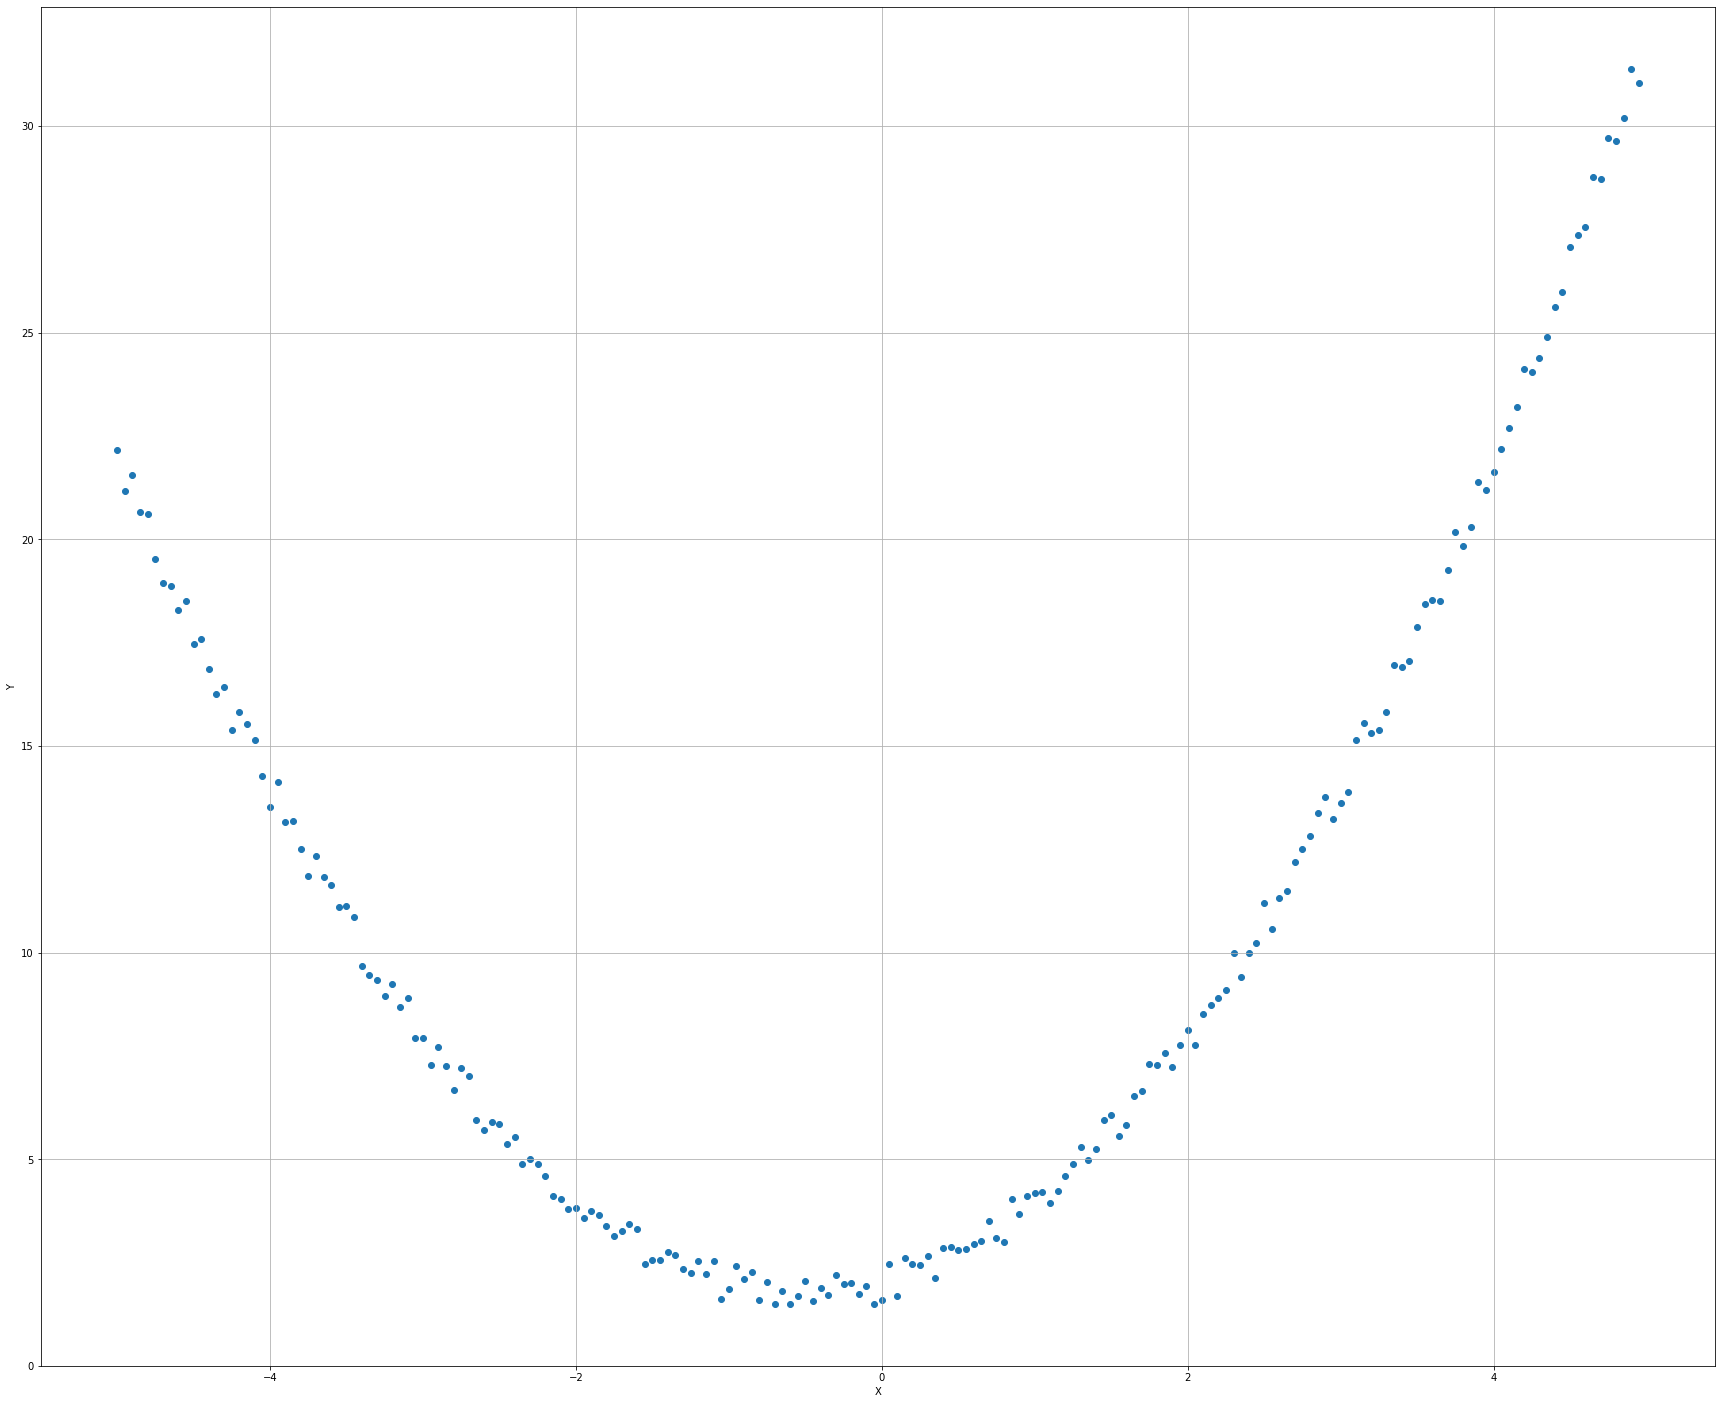

In [11]:
# Create dataset
X = np.arange(-5, 5, 0.05)

Y = X + 2
Y += X**2 + np.random.uniform(-0.5, 0.5, size=nb_samples)

# So the original equation is Y = X**2 + X + 2, excluding noise.

print(X.shape, Y.shape)

# Show the dataset
show_dataset(X, Y)


In [12]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(-1, 1), Y.reshape(-1, 1), test_size=0.25)
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)
print('Linear regression score: %.3f' % lr.score(X_train, Y_train))

(150, 1)
Linear regression score: 0.120


In [13]:
# Create polynomial features
pf = PolynomialFeatures(degree=2)
print(X_train.shape)
X_train = pf.fit_transform(X_train)
print(X_train.shape)
X_test = pf.fit_transform(X_test)
lr.fit(X_train, Y_train)
print('Second degree polynomial regression score: %.3f' % lr.score(X_train, Y_train))


(150, 1)
(150, 3)
Second degree polynomial regression score: 0.999


In [18]:
X = [[1],[2],[3]]
X2 = PolynomialFeatures(degree=2).fit_transform(X)
X1 = PolynomialFeatures(degree=1).fit_transform(X)
print(X1)
print()
print(X2)

[[1. 1.]
 [1. 2.]
 [1. 3.]]

[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


In [20]:
print(lr.intercept_, lr.coef_)

[2.00267989] [[0.         0.99605191 0.99721465]]


In [21]:
X3 = PolynomialFeatures(degree=3).fit_transform(X)
X3.shape

(3, 4)

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_boston

In [29]:
boston = load_boston()
pf = PolynomialFeatures(degree=2) 
Xp = pf.fit_transform(boston.data) 
print(boston.data.shape, Xp.shape)

(506, 13) (506, 105)


In [30]:
lr = LinearRegression(normalize=True)
lr.fit(Xp, boston.target)
lr.score(Xp, boston.target)

0.9175312489759742

Usually, a good approach is using the class SelectFromModel to let scikit-learn select the best features based on their importance. **In fact, when the number of features increases, the probability that all of them have the same importance gets lower.** This is the result of mutual correlation or of the co- presence of major and minor trends, which act like noise and don't have the strength to alter perceptibility the hyperplane slope. Moreover, when using a polynomial expansion, some weak features (that cannot be used for a linear separation) are substituted by their functions and so the actual number of strong features decreases.

My understanding so far: Suppose some features are weaker than others. The product of weak ones makes even weaker ones at high order, the product of weak and strong reduces the strong also. Thus making dimension reduction relevant.

In [31]:
# threshold dictates some measurements of strength.  
sm = SelectFromModel(lr, threshold=10)
Xt = sm.fit_transform(Xp, boston.target)
print(Xp.shape, Xt.shape)
sm.estimator_.score(Xp, boston.target)

(506, 105) (506, 8)


0.9175312489759742

The number of features is reduced ***from 105 to 8*** without altering the score!

In [32]:
# Dimensionality reduction can be reversed if necessary.
Xo = sm.inverse_transform(Xt)
Xo.shape


(506, 105)